In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [1]:
import numpy as np
import cv2
import keras
from keras import regularizers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, GRU, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.optimizers import SGD
from keras.datasets import imdb
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import StratifiedKFold
from keras.layers.convolutional import Conv1D, MaxPooling1D
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input

#############################3   Import Packages ##########################################3
import os
import tensorflow as tf
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Merge
from keras.layers import Input

Using TensorFlow backend.
/home/isha.d/.local/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/isha.d/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/isha.d/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the mo

## Data

In [2]:
def get_value(data):
    arr_row = []
    for i in range(len(data)):
        row = data[i]
        pt1 = row[1] + (row[3] - row[1])/2
        pt2 = row[2] + (row[4] - row[2])/2
        temp =[int(pt1), int(pt2)]
        arr_row.append(temp)
        
    return np.array(arr_row)

In [3]:
def get_features(folder):
    arr_X_lefteye = []; 
    arr_X_righteye = []; 
    arr_X_face_features = []
    arr_Y =[]
    
    for i in range(112):

        filenameX = "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_features_game/sample"+str(i+1)
        filenameY= "/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/original_road_view/sample_"+str(i+1)+".npy"
        
        if(os.path.exists("/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user"+str(folder)+"/explicit_face_features_game/") and os.path.exists(filenameY)
          and os.path.exists(filenameX +"_left_eye_data.npy") and os.path.exists(filenameX +"_right_eye_data.npy")
          and os.path.exists(filenameX +"_headpose_pupil.npy")):
            
            x_lefteye = np.load(filenameX +"_left_eye_data.npy")
            x_righteye = np.load(filenameX +"_right_eye_data.npy")
            x_face_features = np.load(filenameX +"_headpose_pupil.npy")
            
            #print(i)
            y = np.load(filenameY)

            if(y.shape[0]>=50):
                
                arr_X_lefteye.append(x_lefteye[:50])
                arr_X_righteye.append(x_righteye[:50])
                arr_X_face_features.append(x_face_features[:50])
                
                if(i>=9):
                    arr_Y.append(get_value(y[:50,:]))
                else: 
                    arr_Y.append(y[:50,:])

   # print(np.array(arr_X_lefteye).shape, np.array(arr_X_righteye).shape, np.array(arr_X_face_features).shape, np.array(arr_Y).shape)
    return np.array(arr_X_lefteye), np.array(arr_X_righteye), np.array(arr_X_face_features), np.array(arr_Y)

            

In [4]:
left_eye1, right_eye1, face_features1, Y1 = get_features(2)
left_eye2, right_eye2, face_features2, Y2 = get_features(3)
left_eye3, right_eye3, face_features3, Y3 = get_features(5)
left_eye4, right_eye4, face_features4, Y4 = get_features(7)
left_eye5, right_eye5, face_features5, Y5 = get_features(8)
left_eye6, right_eye6, face_features6, Y6 = get_features(10)
left_eye7, right_eye7, face_features7, Y7 = get_features(11)
left_eye8, right_eye8, face_features8, Y8 = get_features(12)
left_eye9, right_eye9, face_features9, Y9 = get_features(13)
left_eye10, right_eye10, face_features10, Y10 = get_features(14)


left_eye_data = np.concatenate((left_eye1, left_eye2, left_eye3, left_eye4, left_eye5, left_eye6, left_eye7,
                                left_eye8, left_eye9), axis = 0)

right_eye_data = np.concatenate((right_eye1, right_eye2, right_eye3, right_eye4, right_eye5, right_eye6
                                 , right_eye7, right_eye8, right_eye9), axis = 0)

face_features_data = np.concatenate((face_features1, face_features2, face_features3, face_features4, face_features5
                                     , face_features6, face_features7, face_features8, face_features9
                                     ), axis = 0)
Ydata = np.concatenate((Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9), axis = 0)

print(left_eye_data.shape, right_eye_data.shape, face_features_data.shape,Ydata.shape)
# print(left_eye_data.shape, right_eye_data.shape, face_features_data.shape, Ydata.shape)

(947, 50, 36, 60, 3) (947, 50, 36, 60, 3) (947, 50, 11) (947, 50, 2)


In [5]:
left_eye_data1 = left_eye_data[:,:,:,:,:]
right_eye_data1 = right_eye_data[:,:,:,:,:]
face_features_data1 = face_features_data[:,:,:]
Ydata1 = Ydata[:,:,:]


print(left_eye_data1.shape, right_eye_data1.shape, face_features_data1.shape, Ydata1.shape)

(947, 50, 36, 60, 3) (947, 50, 36, 60, 3) (947, 50, 11) (947, 50, 2)


In [6]:
left_eye_data2 = left_eye_data1.reshape((left_eye_data1.shape[0]*left_eye_data1.shape[1], 
                                         left_eye_data1.shape[2],left_eye_data1.shape[3],
                                         left_eye_data1.shape[4]))

right_eye_data2 = right_eye_data1.reshape((right_eye_data1.shape[0]*right_eye_data1.shape[1], 
                                         right_eye_data1.shape[2],right_eye_data1.shape[3],
                                         right_eye_data1.shape[4]))

face_features_data2 = face_features_data1.reshape((face_features_data1.shape[0]*face_features_data1.shape[1], 
                                         face_features_data1.shape[2]))

Ydata2 = Ydata1.reshape((Ydata1.shape[0]*Ydata1.shape[1], 
                                         Ydata1.shape[2]))


## Divide the data into Train and Val

1.  Train = 80% of total dataset 
    - For images
       1. left_eye_data2
       2. right_eye_data2
       3. face_features_data2
       4. Ydata2
       
    - For videos
    
2.  val = 20% of the dataset
3. Test = left_eye10, right_eye10, face_features10, Y10

In [9]:
from random import shuffle

idx = np.arange(0,len(Ydata1))
#print(idx)

shuffle(idx)
#print(idx[:10])

train_len = int((90 * len(Ydata2))/100)
print(train_len, len(Ydata2)-train_len)

train_idx = idx[:train_len]
val_idx = idx[train_len:len(Ydata2)]


42615 4735


In [10]:
train_left_eye_data = left_eye_data1[train_idx]
train_right_eye_data = right_eye_data1[train_idx]
train_face_features_data = face_features_data1[train_idx] 
train_Ydata = Ydata1[train_idx]

val_left_eye_data = left_eye_data1[val_idx]
val_right_eye_data = right_eye_data1[val_idx]
val_face_features_data = face_features_data1[val_idx] 
val_Ydata = Ydata1[val_idx]

In [11]:
# train_left_eye_data = left_eye_data2[train_idx]
# train_right_eye_data = right_eye_data2[train_idx]
# train_face_features_data = face_features_data2[train_idx] 
# train_Ydata = Ydata2[train_idx]

# val_left_eye_data = left_eye_data2[val_idx]
# val_right_eye_data = right_eye_data2[val_idx]
# val_face_features_data = face_features_data2[val_idx] 
# val_Ydata = Ydata2[val_idx]


test_left_eye_data = left_eye10.reshape((left_eye10.shape[0]*left_eye10.shape[1], 
                                         left_eye10.shape[2],left_eye10.shape[3],
                                         left_eye10.shape[4]))  

test_right_eye_data = right_eye10.reshape((right_eye10.shape[0]*right_eye10.shape[1], 
                                         right_eye10.shape[2],right_eye10.shape[3],
                                         right_eye10.shape[4]))  

test_face_features_data = face_features10.reshape((face_features10.shape[0]*face_features10.shape[1], 
                                         face_features10.shape[2]))

test_Ydata = Y10.reshape((Y10.shape[0]*Y10.shape[1], 
                                         Y10.shape[2]))


## Train model

In [20]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),activation='relu',input_shape=(36,60,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
inputs = Input(shape=(10,))
#model2= model

model3 = Sequential()
model3.add(Dense(100, activation ='relu', input_dim=(10)))

model2 = Sequential()
model2.add(Merge([model, model3], mode = 'concat'))

model2.add(Dense(512, activation='relu'))
model2.add(Dense(2))
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 34, 58, 20)        560       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 29, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 27, 50)        9050      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 13, 50)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4550)              0         
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________
None


/home/isha.d/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  


In [21]:
model2.compile(loss='mae', optimizer='adam')
#history = model2.fit([left_eye_data1[:270], face_features_data1[:270,1:]], Ydata1[:270], epochs=500, verbose=1)

In [22]:
earlystopping = keras.callbacks.EarlyStopping(monitor = 'val_loss',min_delta = 1, patience =2, verbose =0, mode ='auto')

history = model2.fit([train_left_eye_data, train_face_features_data[:,1:]], train_Ydata, epochs=300, 
                     batch_size=40, callbacks=[earlystopping], validation_data=([val_left_eye_data,
                     val_face_features_data[:,1:]],val_Ydata), verbose=2, shuffle= True)
print(history.history.keys())


Train on 42615 samples, validate on 4735 samples
Epoch 1/300
 - 6s - loss: 266.7920 - val_loss: 162.6963
Epoch 2/300
 - 6s - loss: 166.2260 - val_loss: 197.8201
Epoch 3/300
 - 6s - loss: 145.1361 - val_loss: 138.9590
Epoch 4/300
 - 7s - loss: 133.4310 - val_loss: 131.4955
Epoch 5/300
 - 6s - loss: 125.8843 - val_loss: 133.4646
Epoch 6/300
 - 6s - loss: 117.9753 - val_loss: 115.7475
Epoch 7/300
 - 6s - loss: 112.0280 - val_loss: 108.2128
Epoch 8/300
 - 6s - loss: 105.7780 - val_loss: 111.9760
Epoch 9/300
 - 6s - loss: 99.5511 - val_loss: 99.8648
Epoch 10/300
 - 6s - loss: 94.2508 - val_loss: 94.1578
Epoch 11/300
 - 6s - loss: 88.6027 - val_loss: 92.2063
Epoch 12/300
 - 6s - loss: 84.0960 - val_loss: 87.1744
Epoch 13/300
 - 6s - loss: 79.4530 - val_loss: 82.6546
Epoch 14/300
 - 6s - loss: 75.4051 - val_loss: 81.4257
Epoch 15/300
 - 6s - loss: 71.6963 - val_loss: 83.5820
Epoch 16/300
 - 6s - loss: 68.2879 - val_loss: 74.6009
Epoch 17/300
 - 6s - loss: 65.4877 - val_loss: 74.7093
Epoch 18/

In [23]:
test_left_eye_data.shape

(5250, 36, 60, 3)

In [24]:
# model2.fit([test_left_eye_data[1000:], test_face_features_data[1000:,1:]], test_Ydata[1000:], epochs=300, 
#                      batch_size=40, callbacks=[earlystopping],
#                     verbose=2, shuffle= True)


dict_keys(['val_loss', 'loss'])


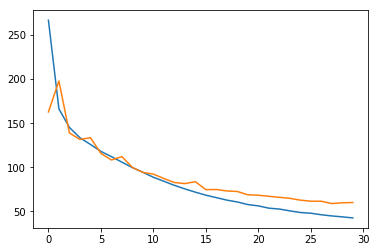

In [25]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [26]:
!mkdir weights_baseline2_images
from keras.models import model_from_json

model_json = model2.to_json()
with open("weights_baseline2_images/model.json", "w") as json_file:
    json_file.write(model_json)

model2.save_weights("weights_baseline2_images/model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open("weights_baseline2_images/model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights_baseline2_images/model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='mae', optimizer='adam')


mkdir: cannot create directory ‘weights_baseline2_images’: File exists
Saved model to disk


/home/isha.d/.local/lib/python3.5/site-packages/keras/engine/topology.py:1269: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


Loaded model from disk


## Test Results

In [27]:
from sklearn.metrics import mean_absolute_error

def compute_error(left_eye_data, face_features_data, Ydata):
    y_true = Ydata
#     y_pred = model2.predict([left_eye_data, face_features_data[:,1:]]).astype(int)
#     error = rmse(y_true, y_pred)
#     print(error)
#     return error
    scores = model2.evaluate([left_eye_data, face_features_data[:,1:]], Ydata)
    return scores

In [28]:
train_error = compute_error(train_left_eye_data, train_face_features_data, train_Ydata)
val_error = compute_error(val_left_eye_data, val_face_features_data, val_Ydata)
test_error = compute_error(test_left_eye_data, test_face_features_data, test_Ydata)
    
print("Train Error ==> ", train_error)
print("Val Error ==> ",  val_error)
print("Test Error ==> " ,test_error)

5250/5250 [==============================] - 0s 54us/step
Train Error ==>  42.38760573089395
Val Error ==>  59.97280243628884
Test Error ==>  259.39360984002974


## Plot values

In [73]:
def plot_image_results(ytest, ypred):
    
    image = np.zeros((1080, 1920))
    count = 0
    
    for i in range(0,len(ypred)):

       # print(y[i,0], y[i,1], pred_y[i][0], pred_y[i][1])
        cv2.circle(image, (ytest[i,0], ytest[i,1]), 5, (255, 0 ,0),50)
        cv2.circle(image, (ypred[i][0], ypred[i][1]), 20, (255, 255, 255), 10)

        if(count ==10):
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            plt.show()
            count =0
            image = np.zeros((1080, 1920))
           # break
        count +=1



In [74]:
def plot_graph(left_eye_data, face_features_data, Ydata):
    
    y_pred = model2.predict([left_eye_data, face_features_data[:,1:]]).astype(int)
   # print(y_pred[:10], Ydata[:10])
    plot_image_results(Ydata, y_pred )

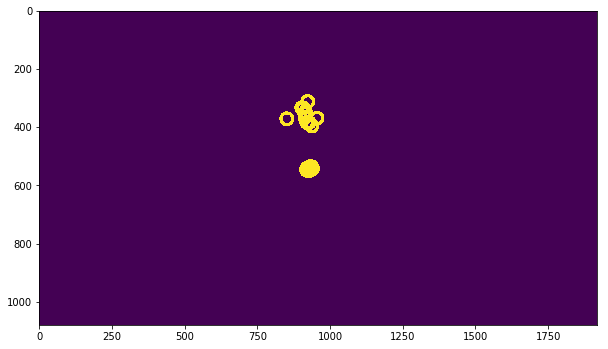

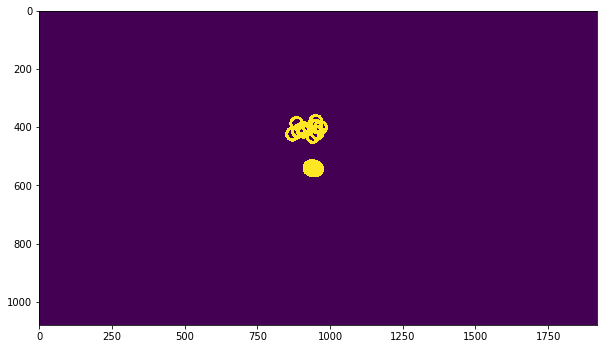

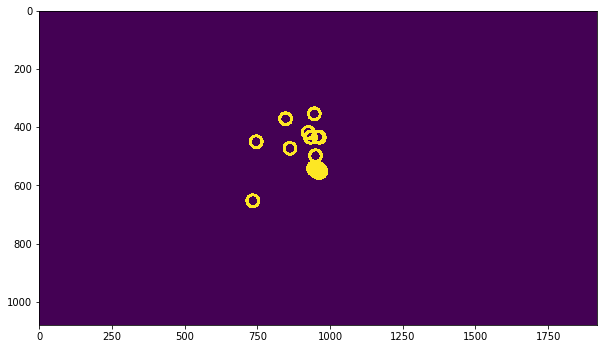

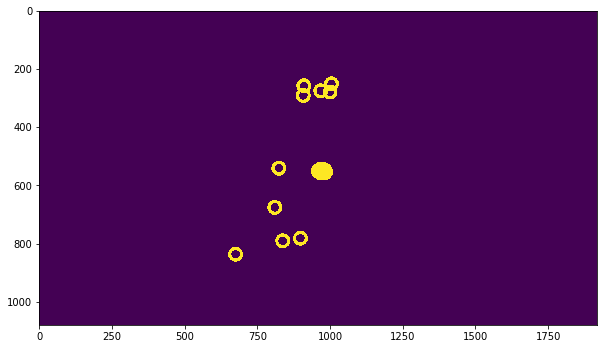

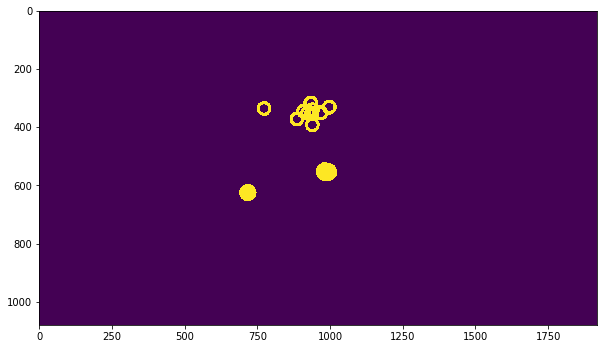

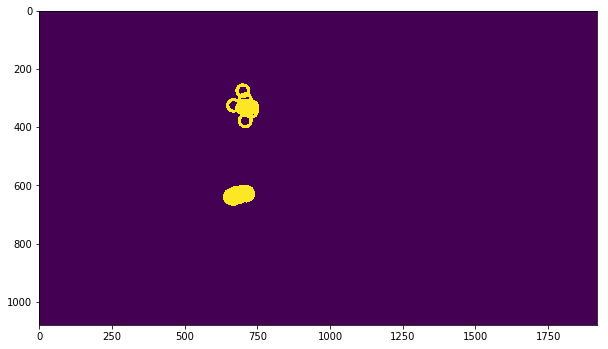

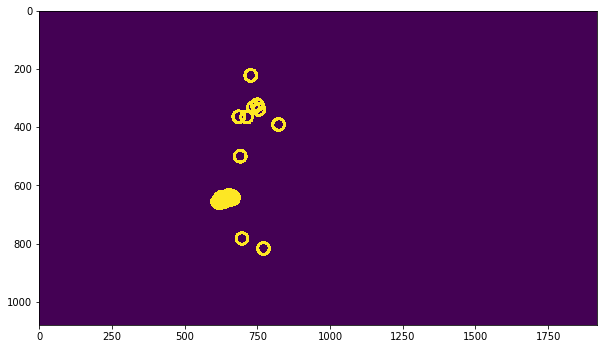

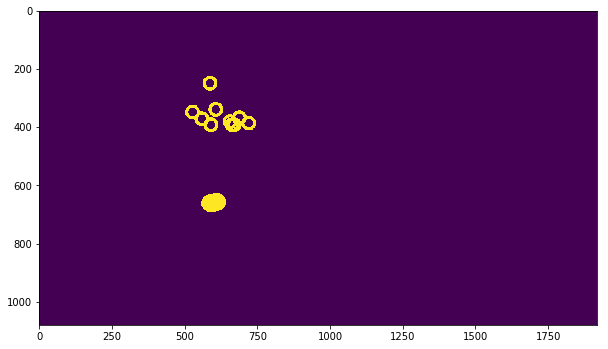

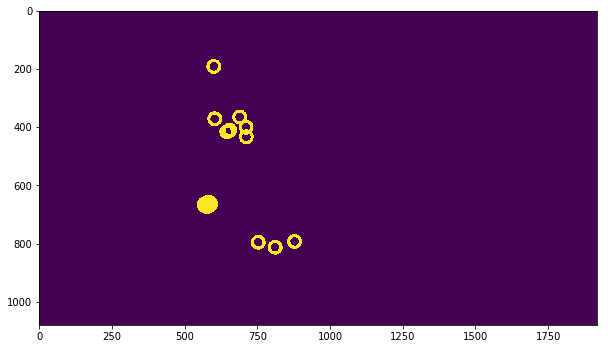

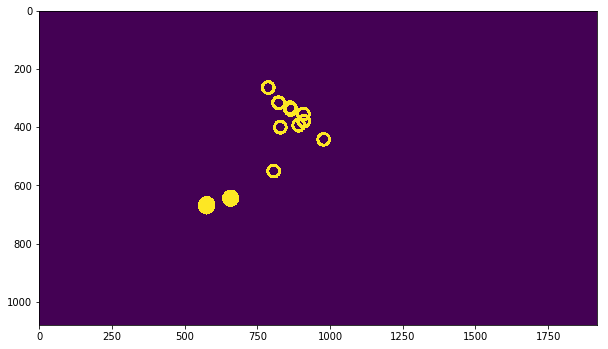

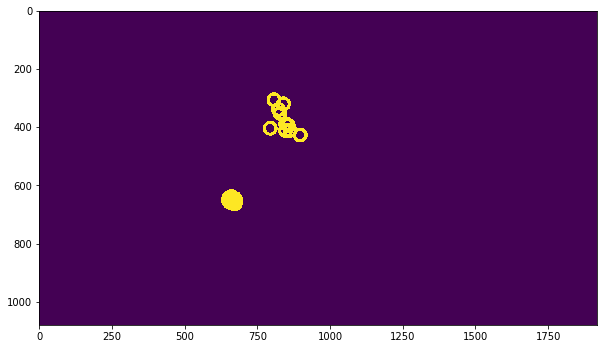

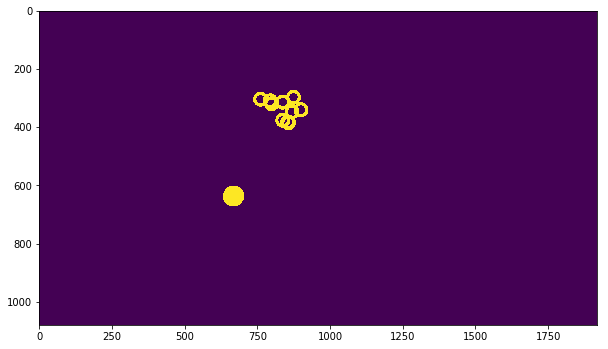

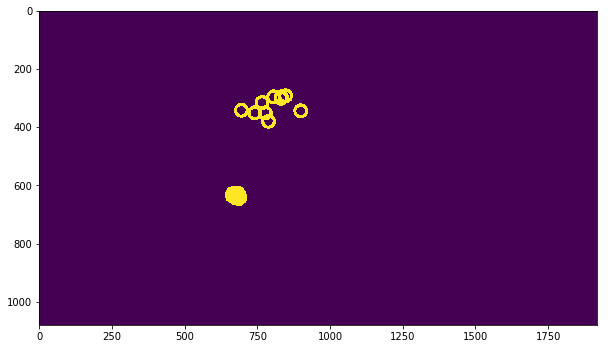

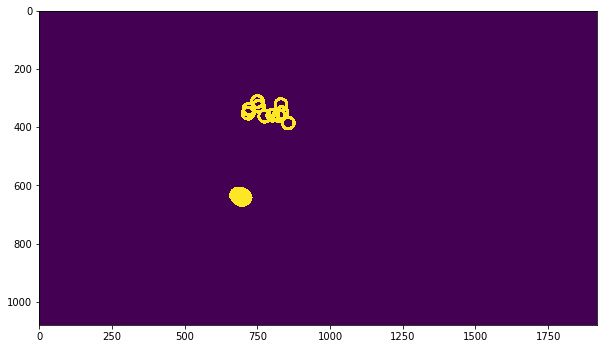

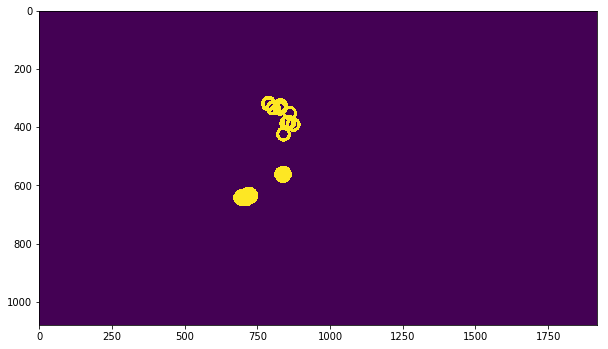

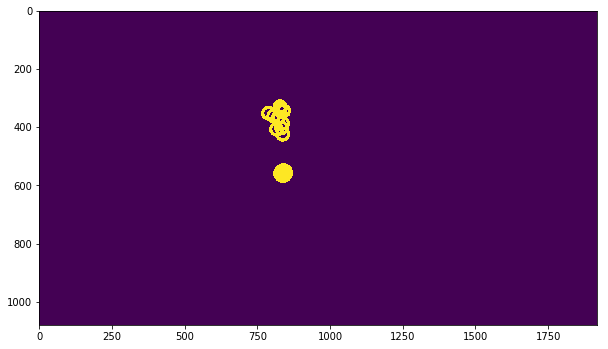

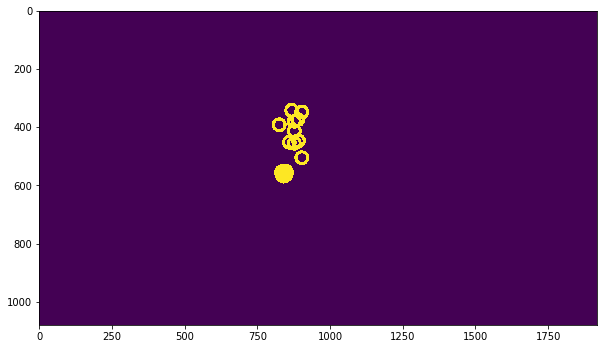

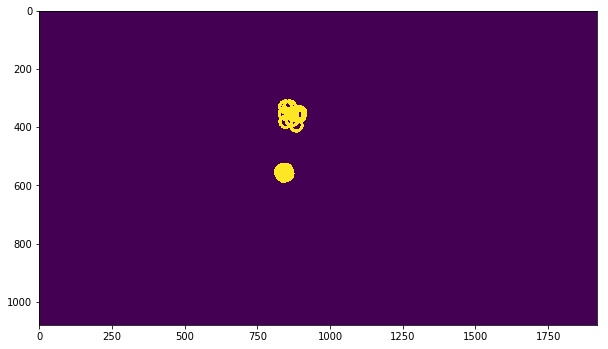

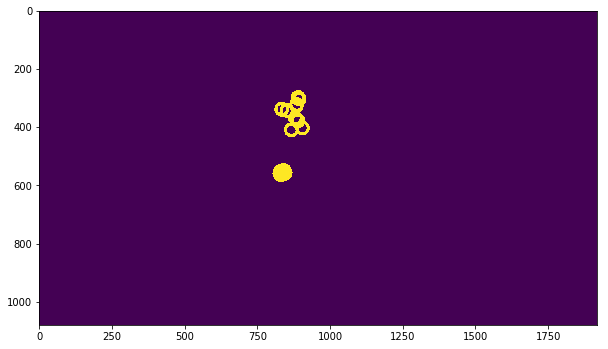

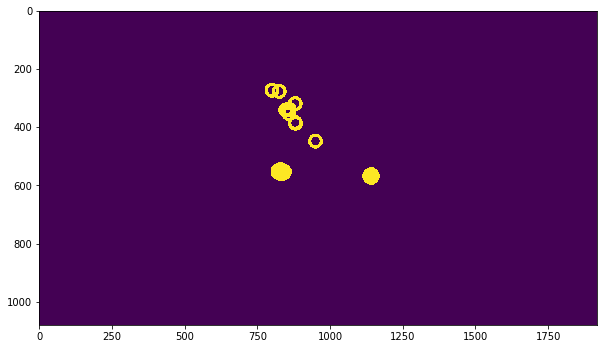

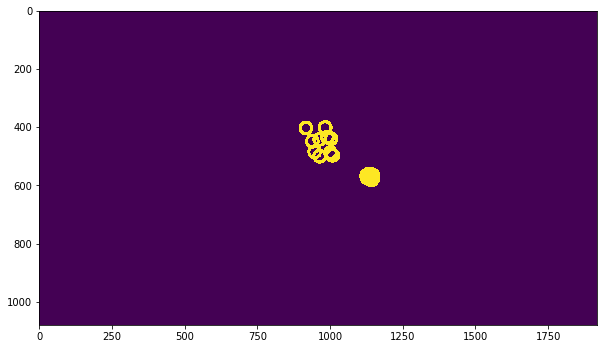

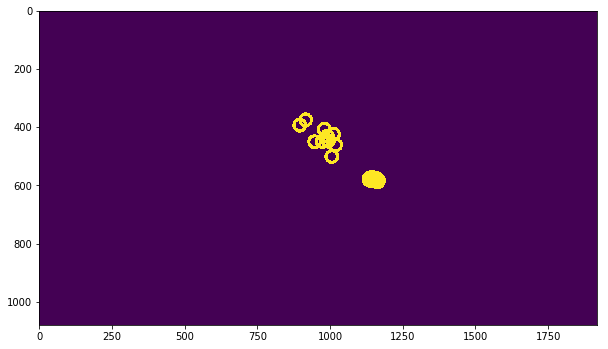

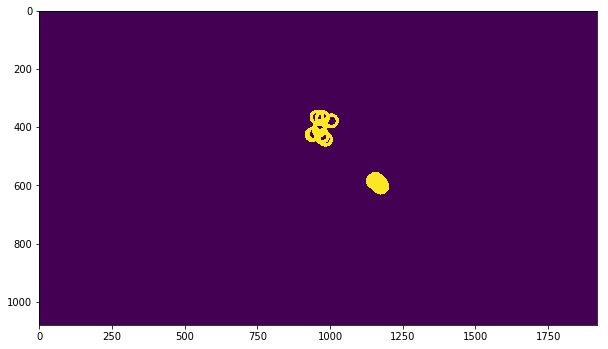

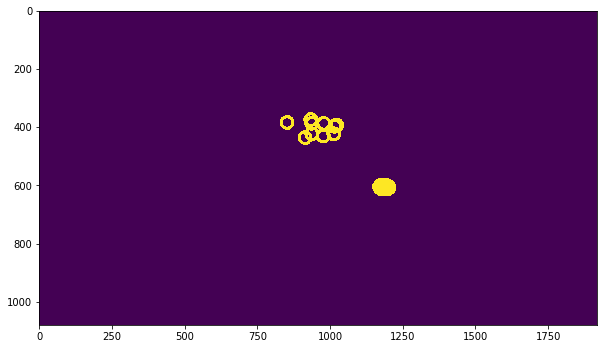

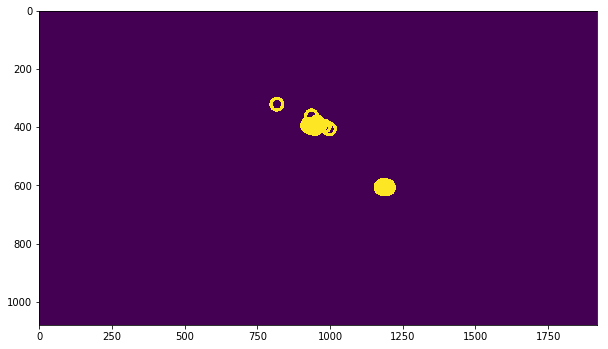

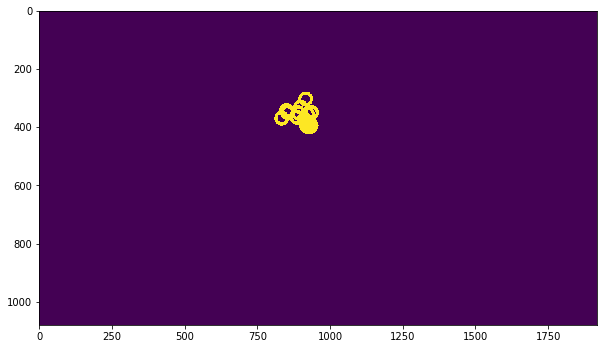

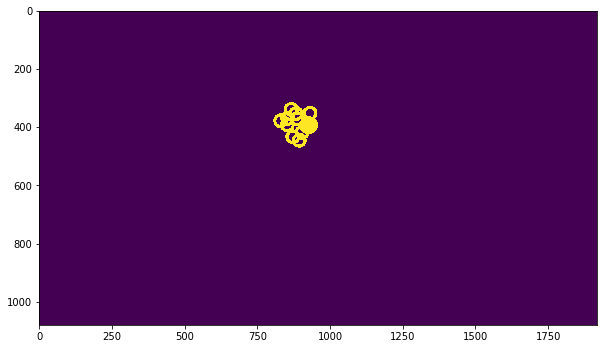

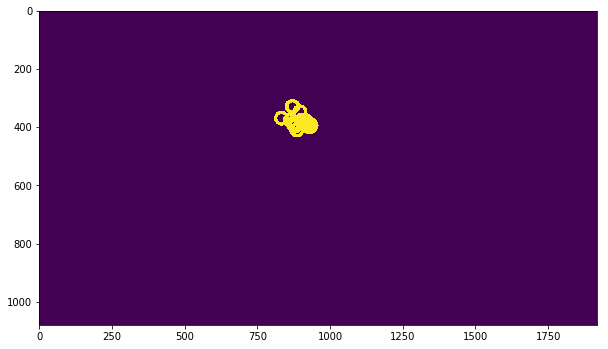

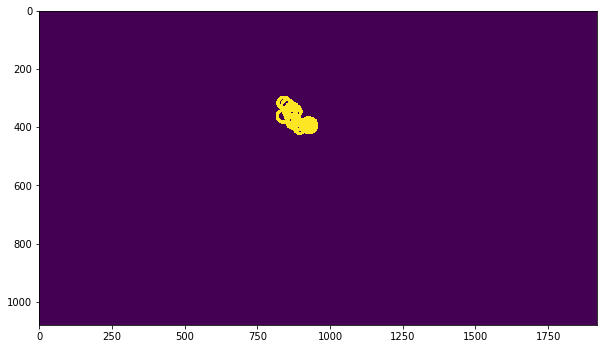

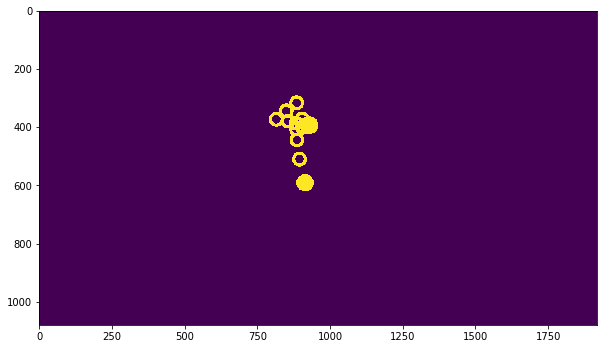

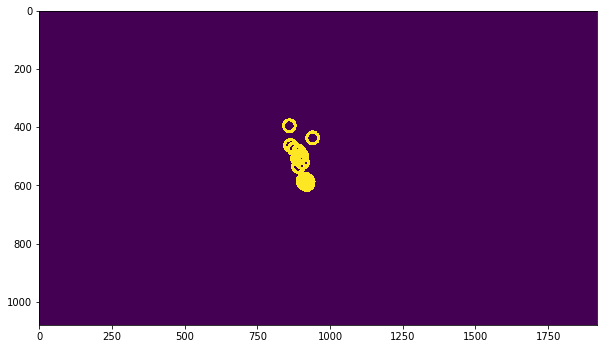

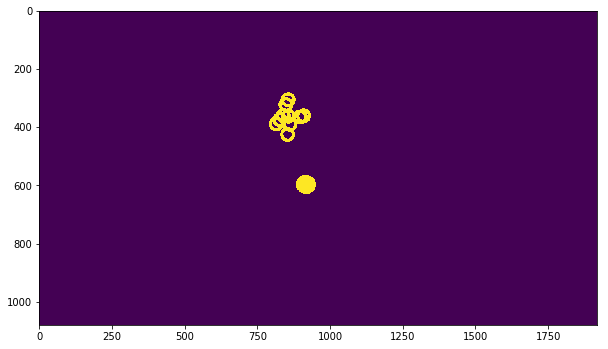

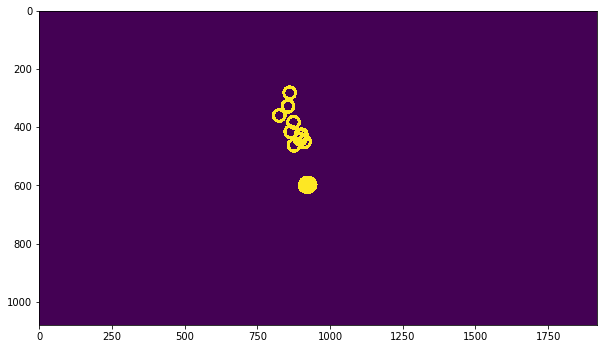

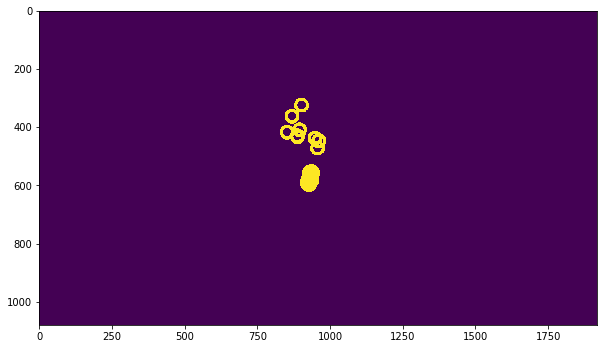

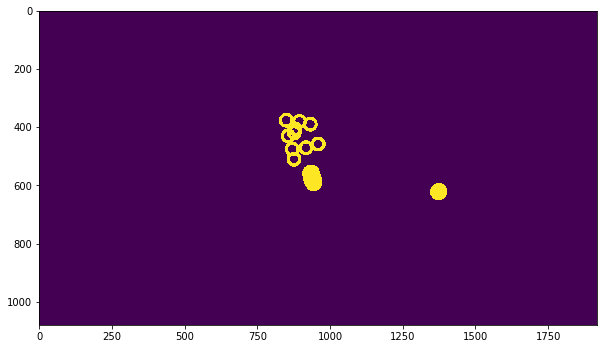

KeyboardInterrupt: 

In [75]:
plot_graph(test_left_eye_data[1000:], test_face_features_data[1000:], test_Ydata[1000:])

In [95]:
def plot_results(ytest, ypred):
    
    #vid = cv2.VideoCapture(video)
    count = 0; i =0
  #  ret, frame= vid.read()
   # image = frame
    image = np.zeros((1080, 1920))
    while(True):
        cv2.circle(image, (ytest[i,0], ytest[i,1]), 5, (255, 255, 255),50)
        cv2.circle(image, (ypred[i][0], ypred[i][1]), 20, (255, 255, 255), 10)
        
        if(count ==100):
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            plt.show()
            cv2.imwrite('faltu.jpg',image)
            count =0
           # ret, frame = vid.read()
            #image = frame
            image = np.zeros((1080, 1920))
           # break
#         else:
# #             ret, frame= vid.read()
#             image = np.zeros((1080, 1920))
        count +=1
        i +=1

In [96]:
def new_video(folder, finetune):
    
    left_eye_data1, right_eye_data1, face_features_data1, Y_data1 = get_features(folder)
    
    left_eye_data2 = left_eye_data1.reshape((left_eye_data1.shape[0]*left_eye_data1.shape[1], 
                                         left_eye_data1.shape[2],left_eye_data1.shape[3],
                                         left_eye_data1.shape[4]))

    right_eye_data2 = right_eye_data1.reshape((right_eye_data1.shape[0]*right_eye_data1.shape[1], 
                                             right_eye_data1.shape[2],right_eye_data1.shape[3],
                                             right_eye_data1.shape[4]))

    face_features_data2 = face_features_data1.reshape((face_features_data1.shape[0]*face_features_data1.shape[1], 
                                             face_features_data1.shape[2]))

    Ydata2 = Ydata1.reshape((Ydata1.shape[0]*Ydata1.shape[1], 
                                             Ydata1.shape[2]))
    
    
    if(finetune == 1):
        model2.fit([left_eye_data2[:2000], face_features_data2[:2000,1:]], Ydata2[:2000], epochs=10, 
                     batch_size=40, callbacks=[earlystopping],
                    verbose=2, shuffle= True)

    y_pred = model2.predict([left_eye_data2[1000:], face_features_data2[1000:,1:]]).astype(int)
    return plot_results(Ydata2[1000:], y_pred )
    

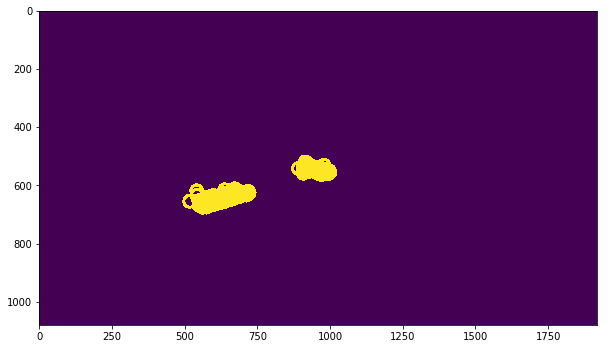

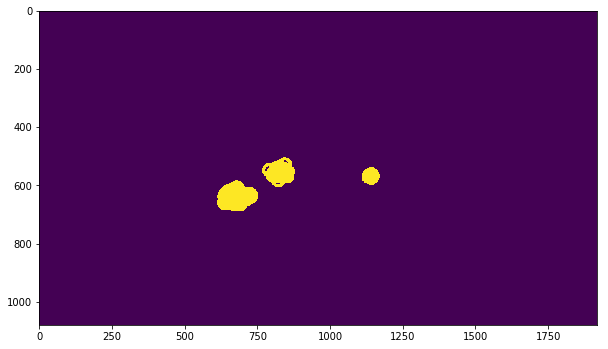

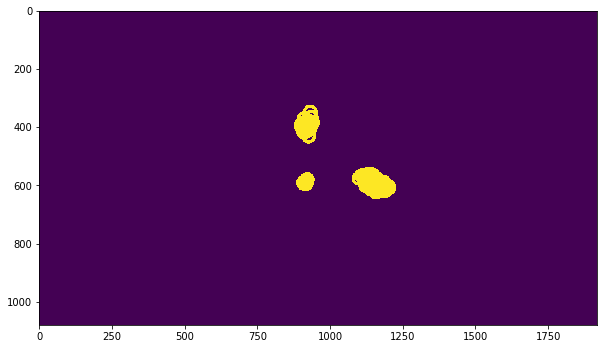

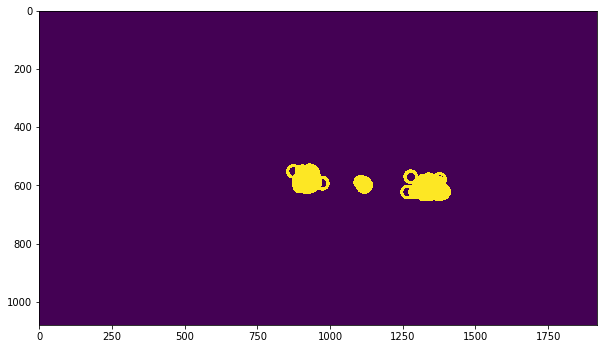

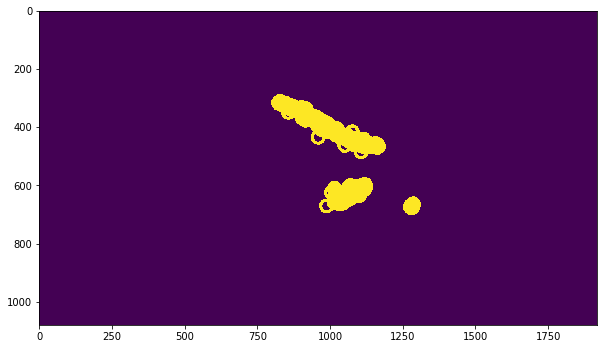

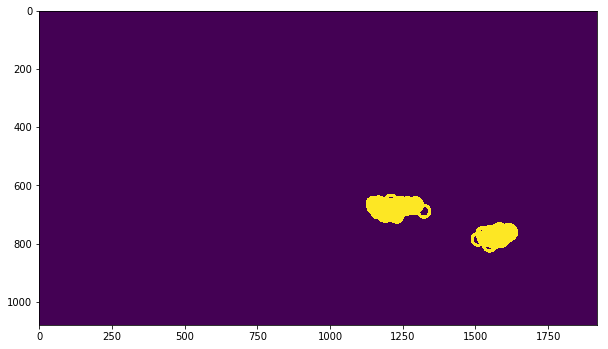

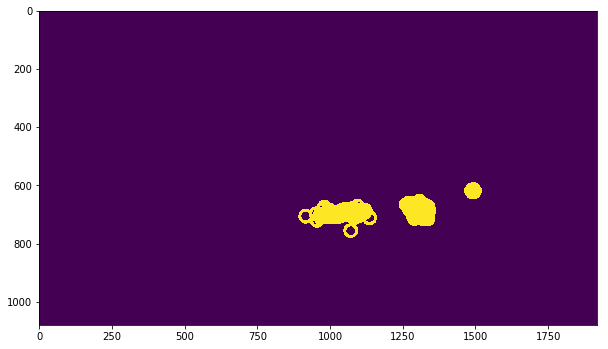

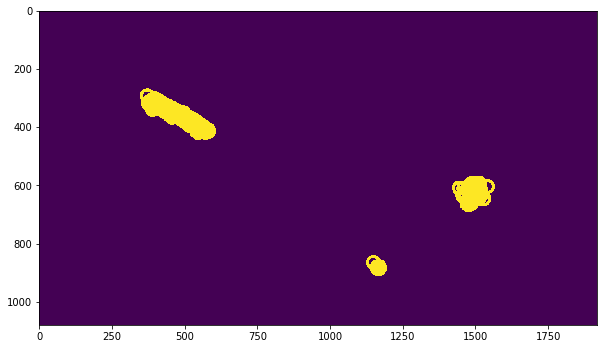

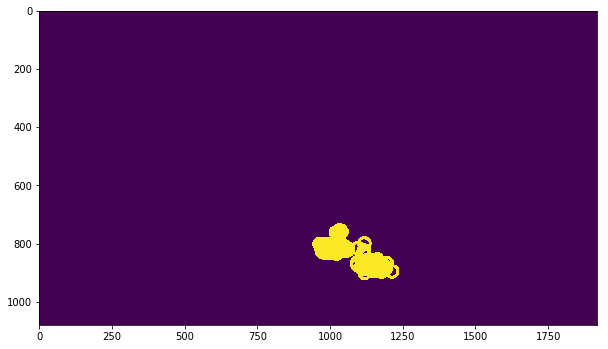

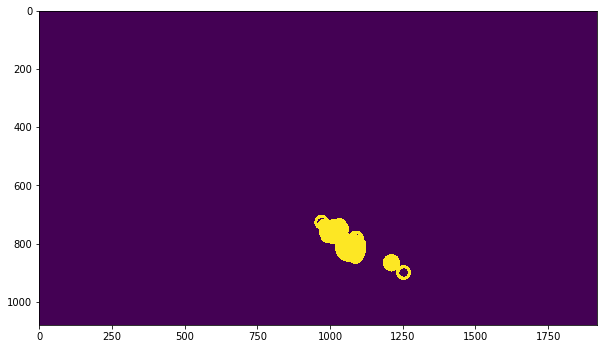

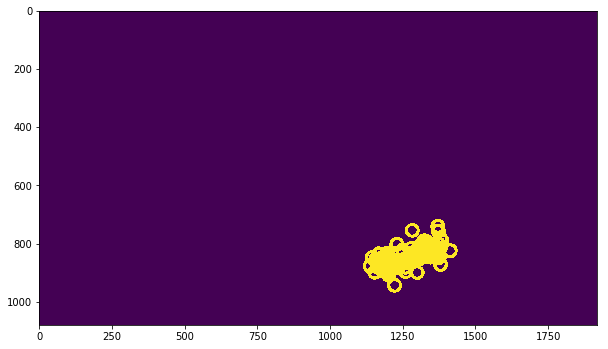

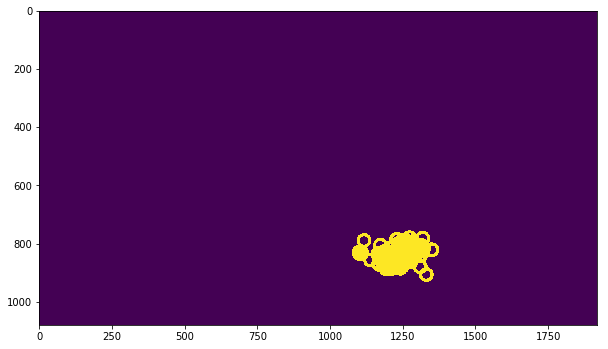

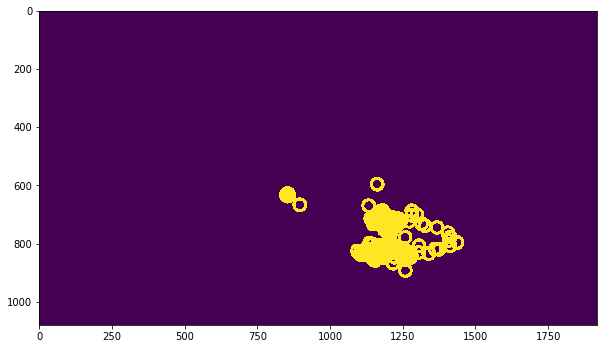

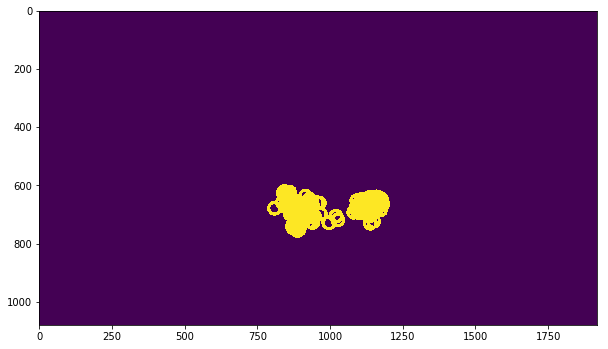

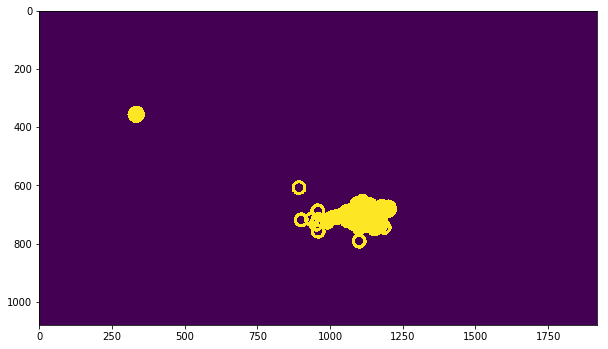

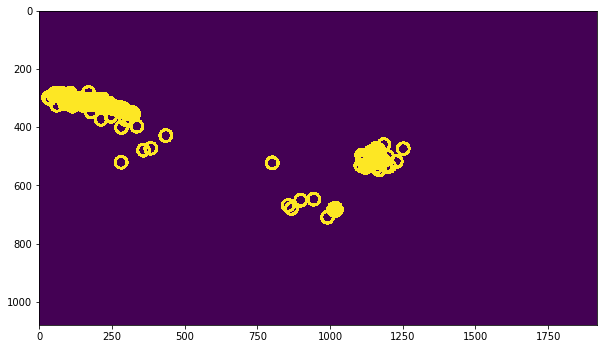

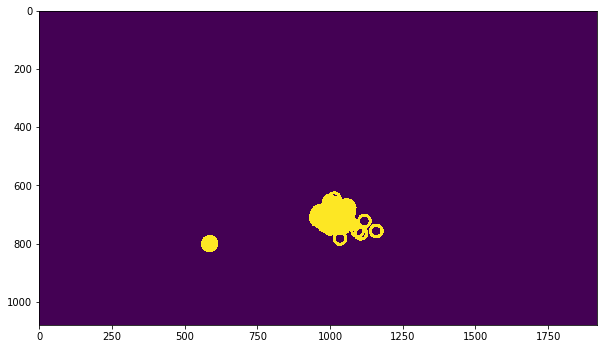

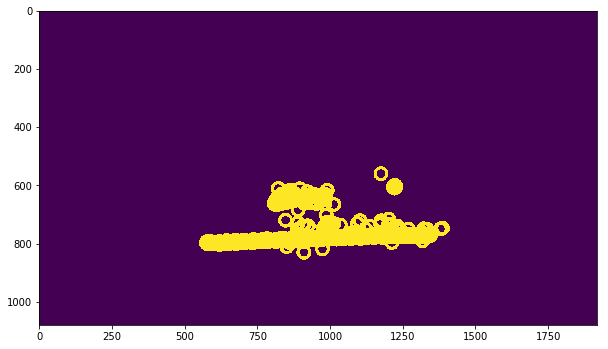

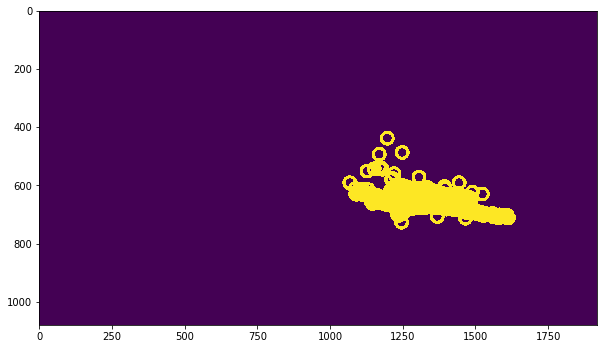

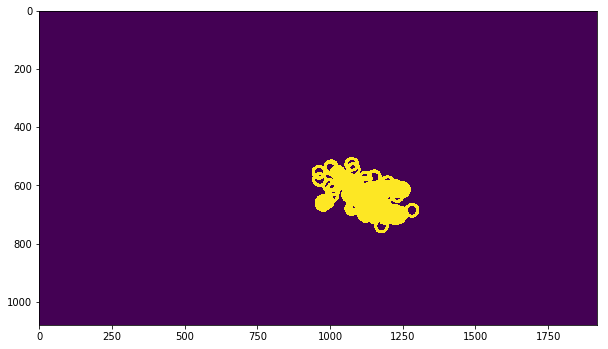

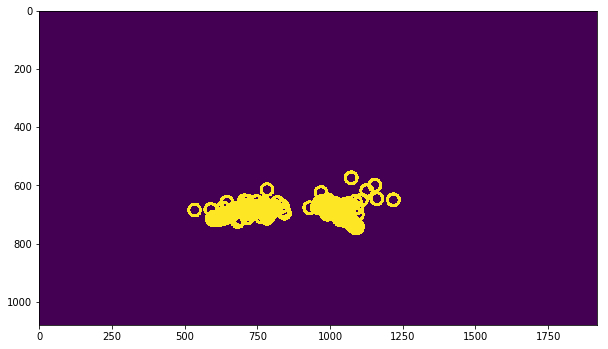

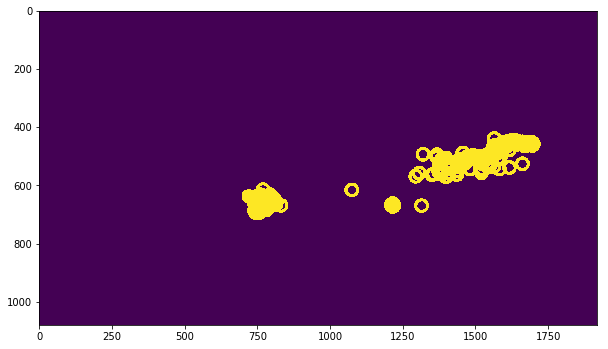

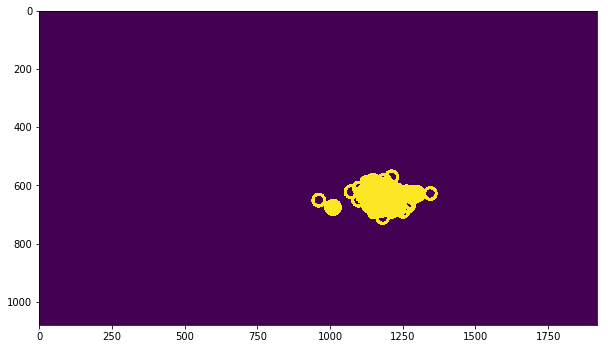

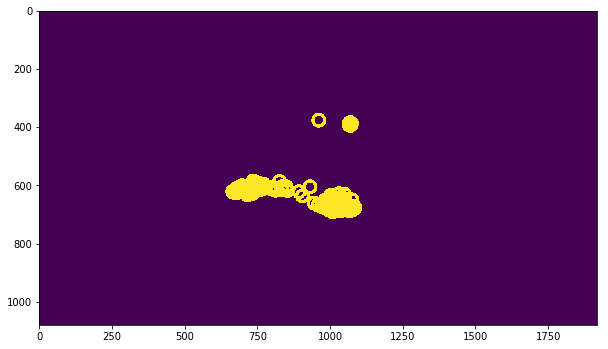

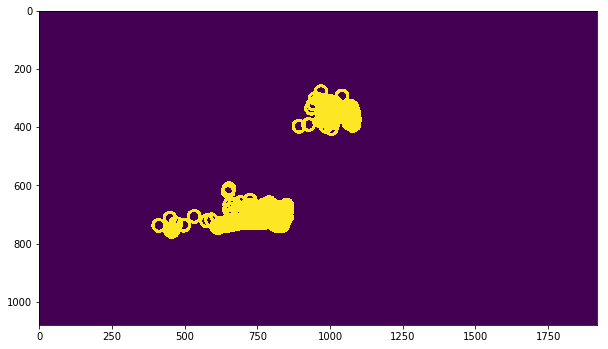

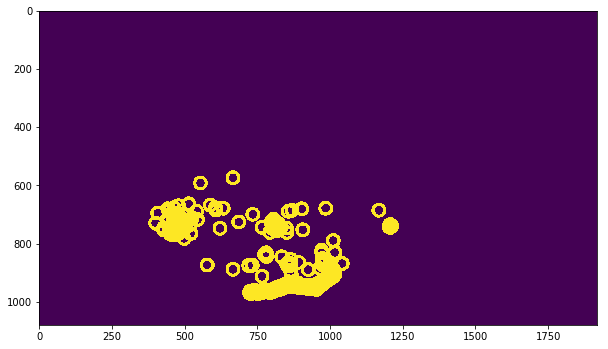

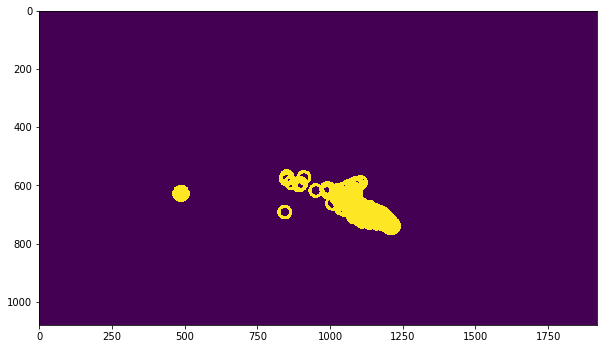

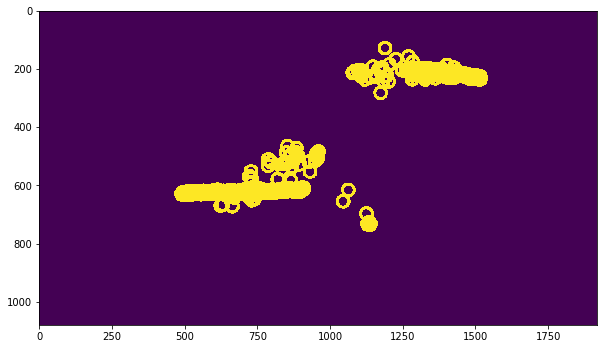

KeyboardInterrupt: 

In [97]:
new_video(2,0)

Epoch 1/10
 - 0s - loss: 14.1589
Epoch 2/10


/home/isha.d/.local/lib/python3.5/site-packages/keras/callbacks.py:526: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 0s - loss: 12.7875
Epoch 3/10
 - 0s - loss: 13.3958
Epoch 4/10
 - 0s - loss: 11.8646
Epoch 5/10
 - 0s - loss: 11.8180
Epoch 6/10
 - 0s - loss: 12.2540
Epoch 7/10
 - 0s - loss: 11.0359
Epoch 8/10
 - 0s - loss: 10.5797
Epoch 9/10
 - 0s - loss: 13.3942
Epoch 10/10
 - 0s - loss: 10.7391


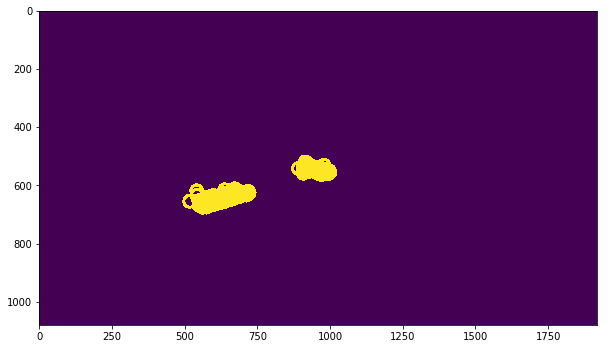

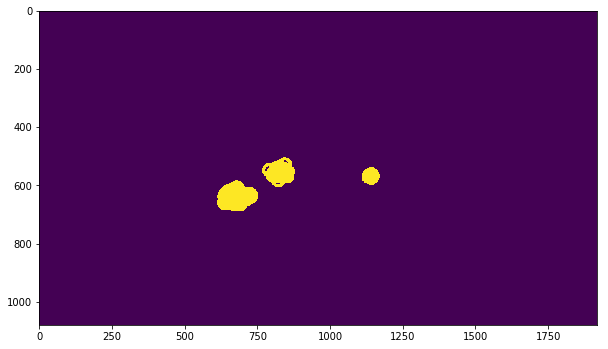

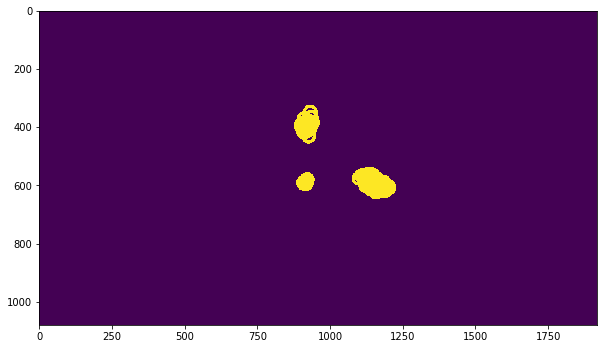

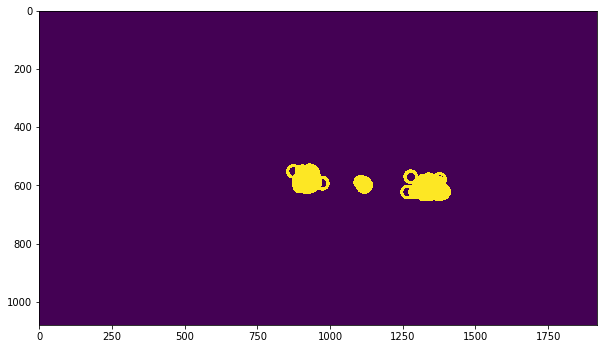

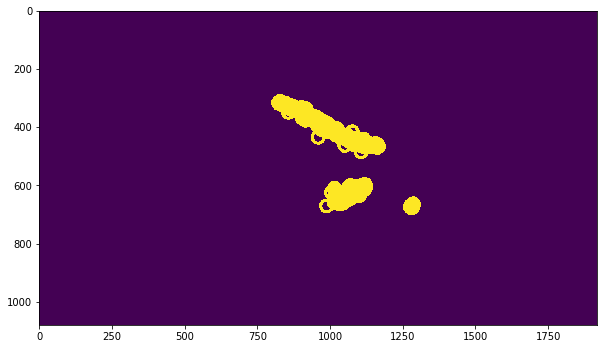

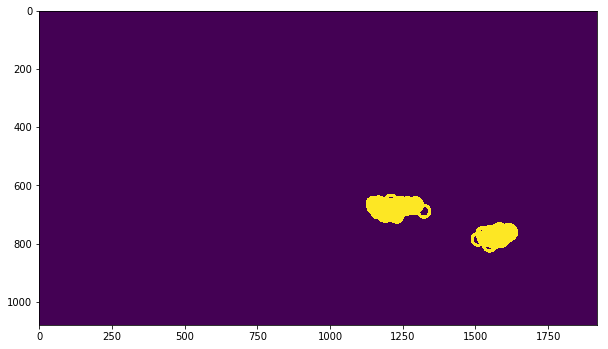

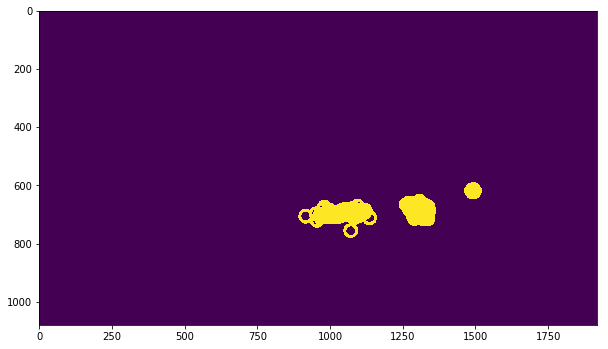

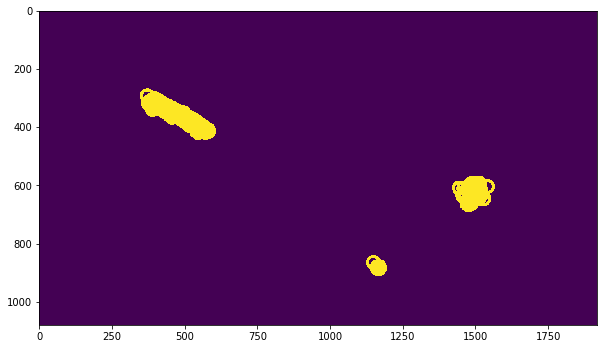

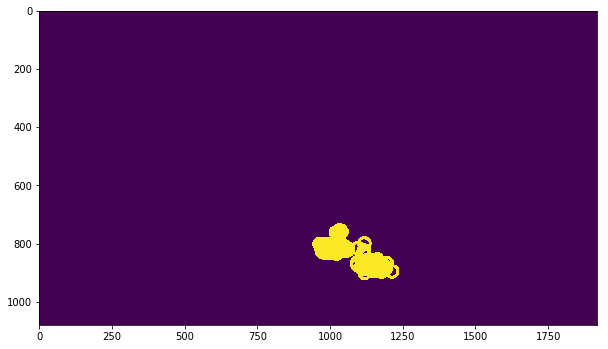

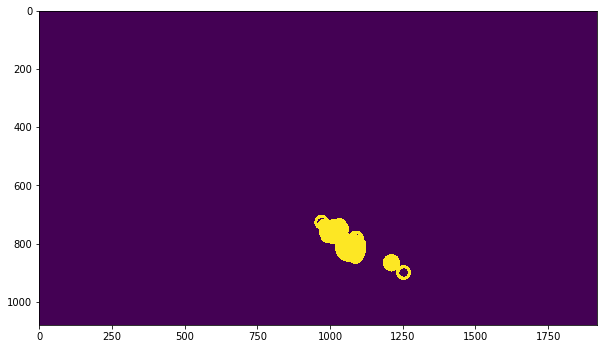

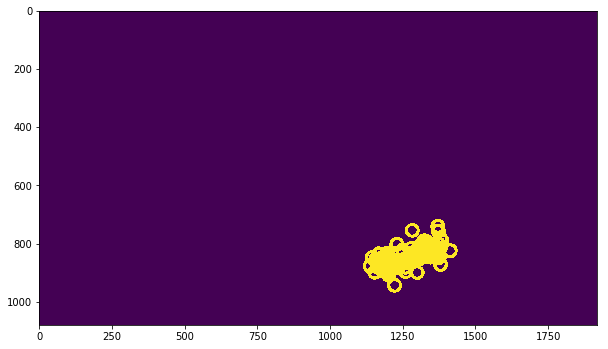

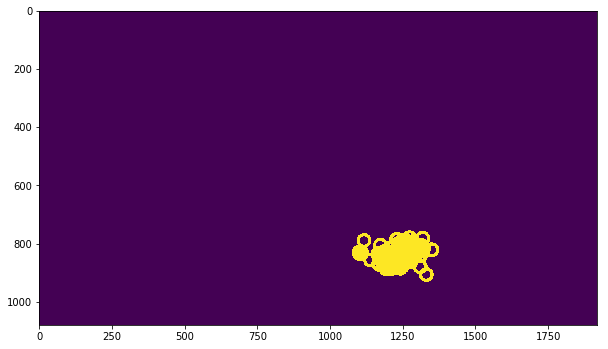

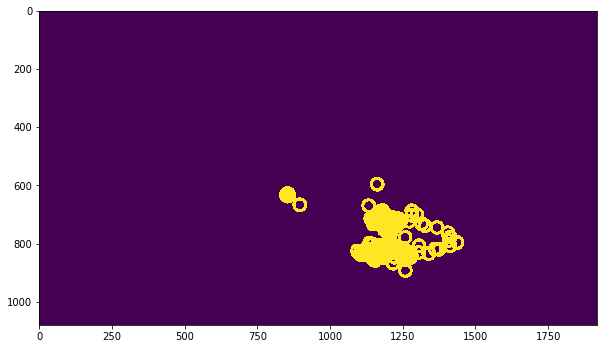

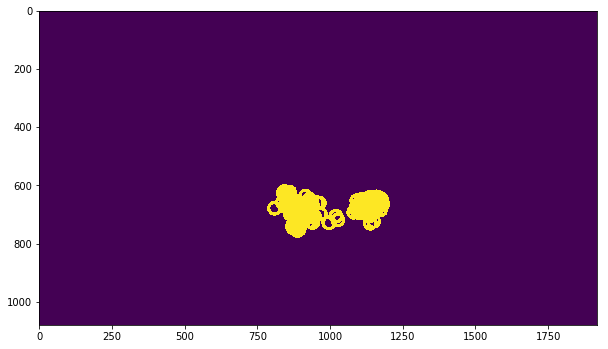

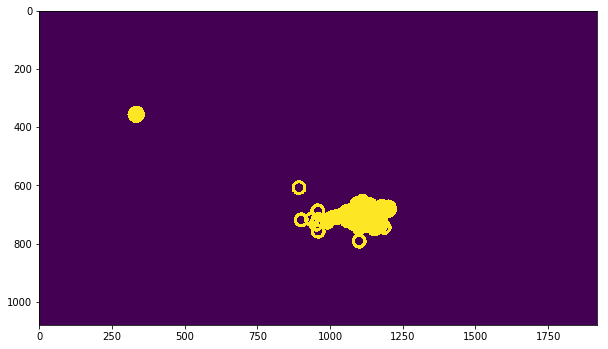

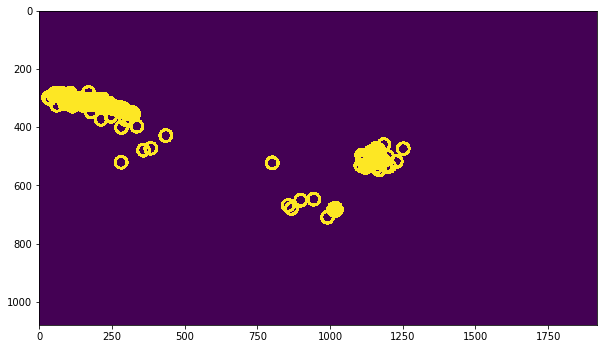

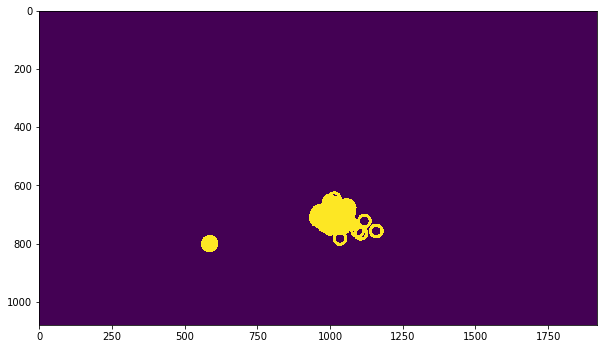

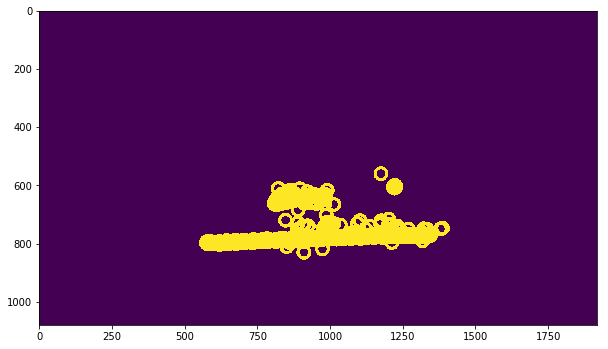

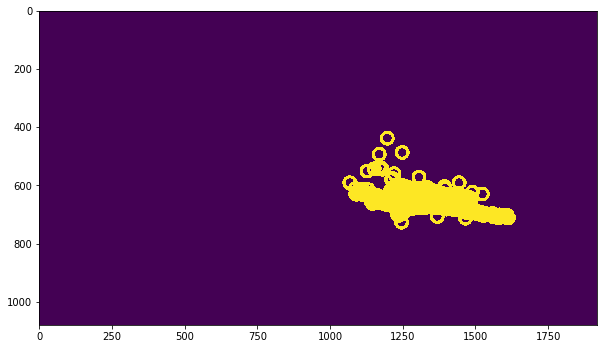

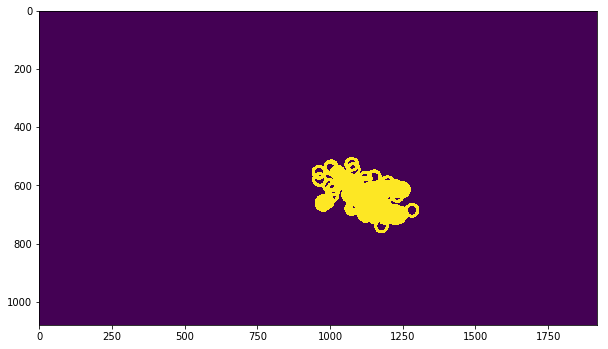

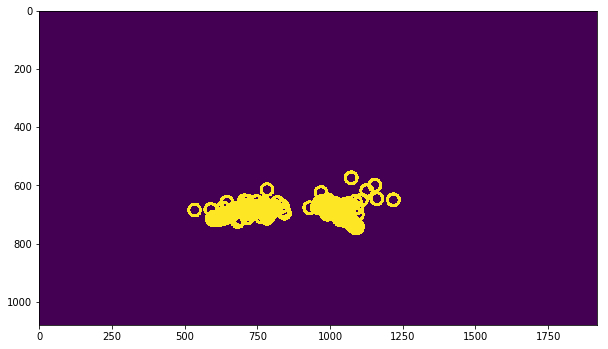

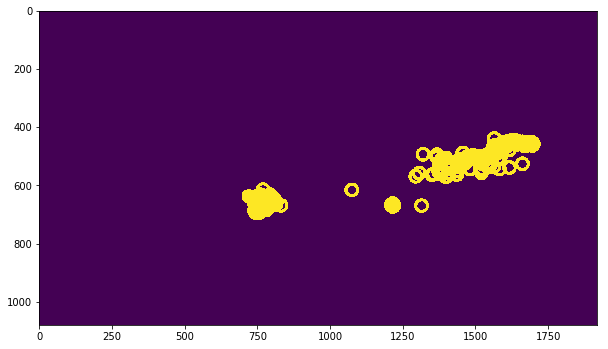

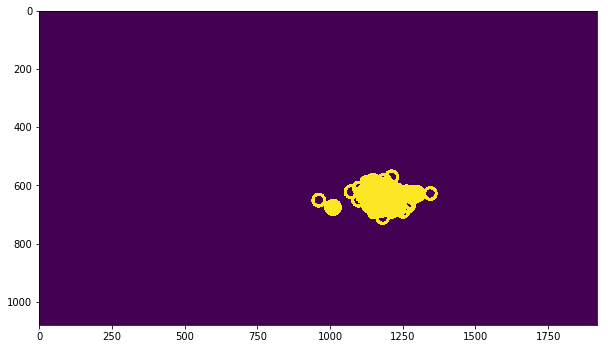

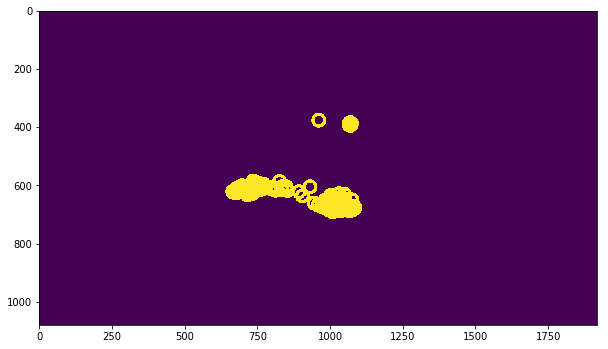

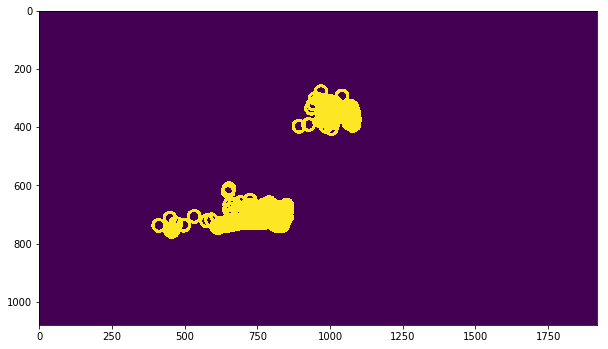

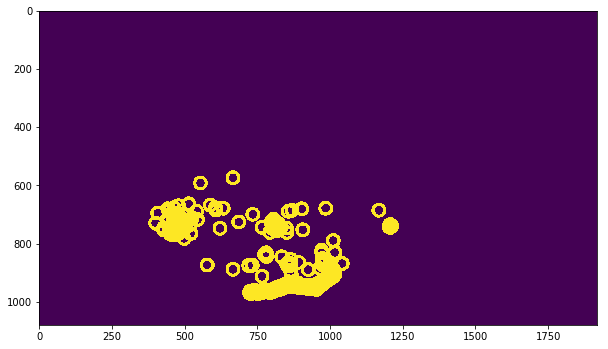

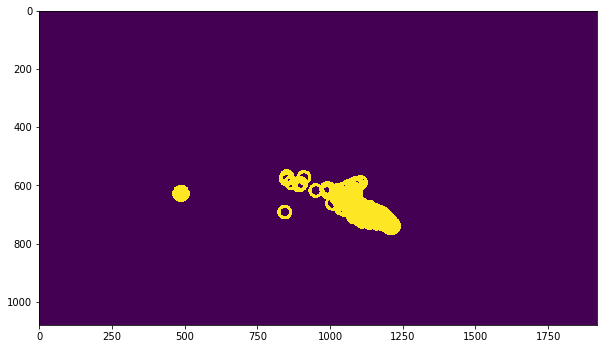

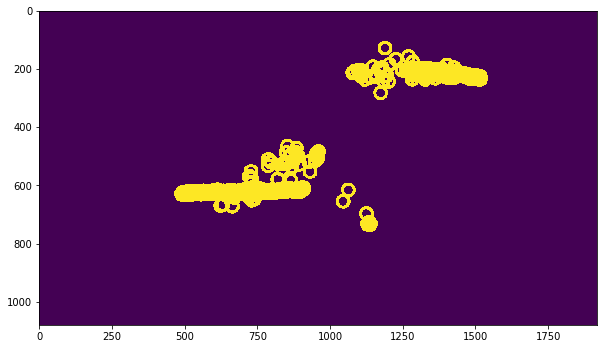

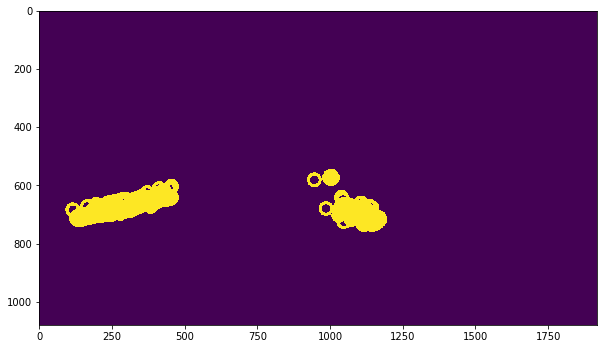

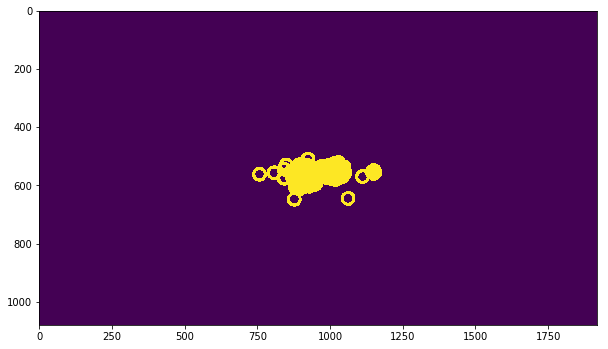

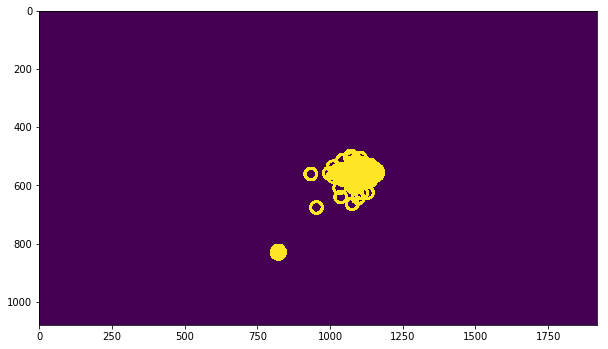

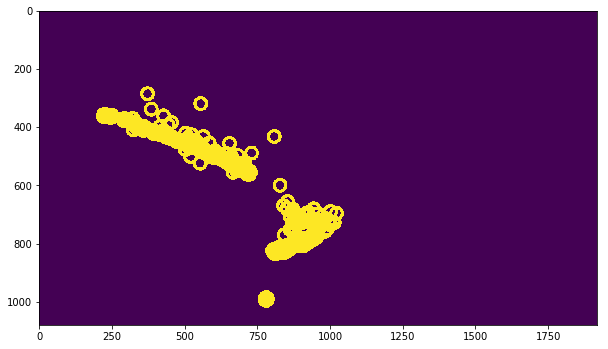

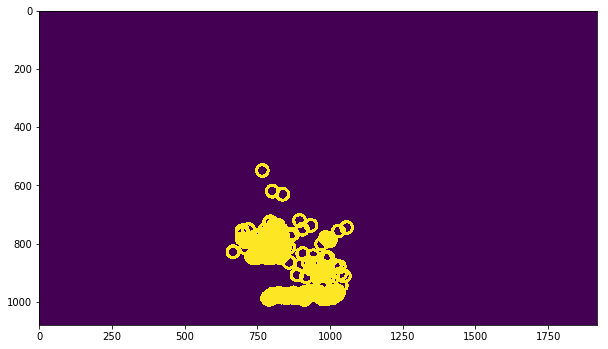

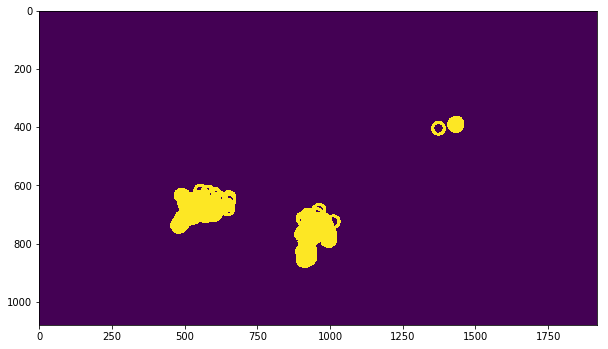

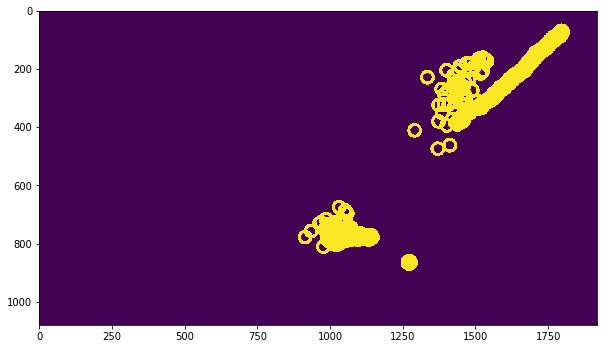

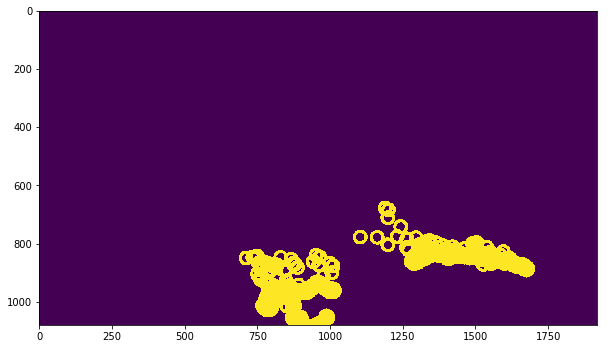

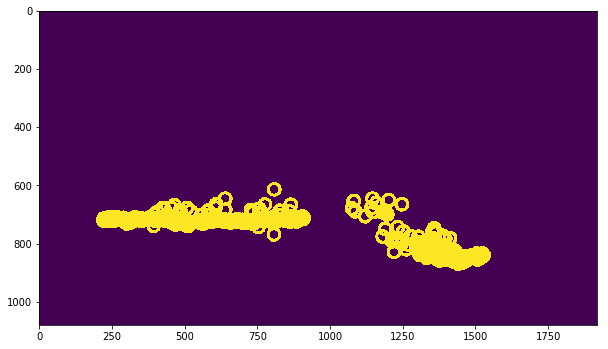

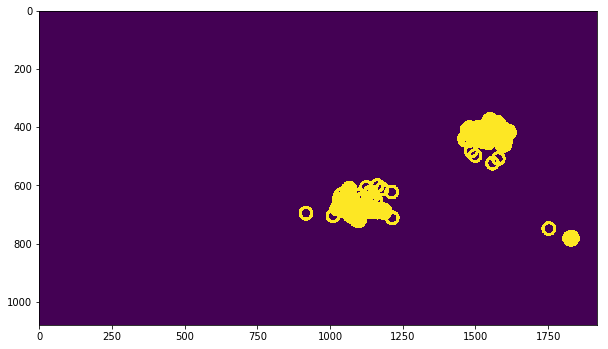

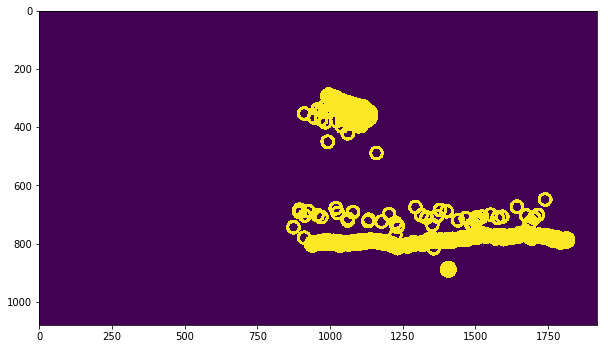

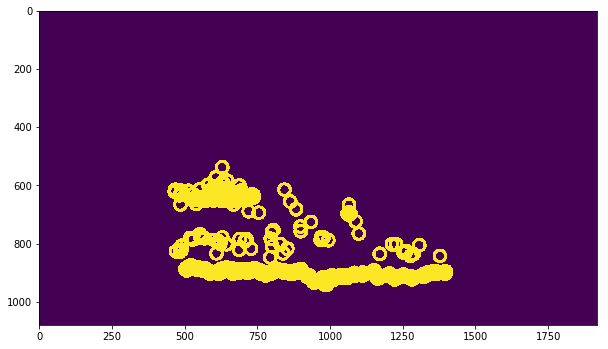

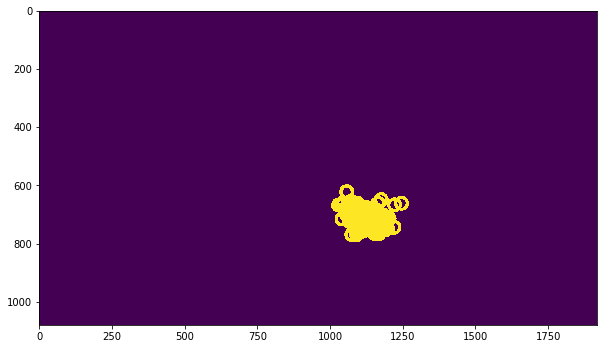

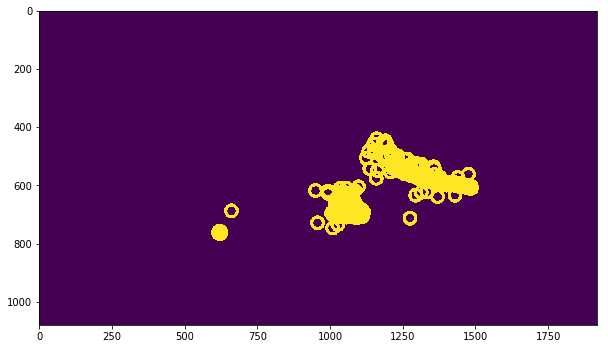

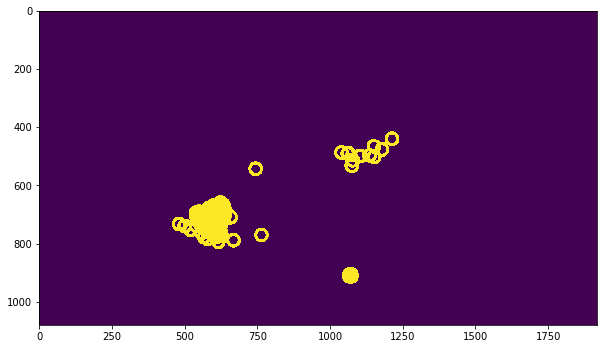

IndexError: index 4400 is out of bounds for axis 0 with size 4400

In [78]:
new_video(2,1)